# </br> Analysis of traffic on the I-94 Interstate highway <br>

This notebook shows the analysis of the dataset containing informations about the westbound traffic on the **I-94 Interstate highway**.
The mainly goal of this project is **to determine a few indicators of heavy traffic** on I-94.

## 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
from dateutil.relativedelta import relativedelta

## 2. Data cleaning and treatment

### 2.1. Extracting the dataset

In [2]:
df_traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

### 2.2. Dataset Overview

Looking at the **first 5 rows**:

In [3]:
df_traffic.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


Looking at the **last 5 rows**:

In [4]:
df_traffic.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


Information about dataset:

In [5]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


- There isn't no **null** value on dataset.
- There're numerical and categorial columns. 
- The period of dataset includes 2012 - 2018

### 2.3. Analyzing Traffic Volume

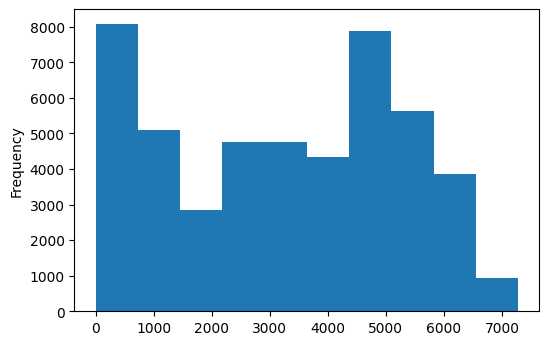

In [6]:
df_traffic['traffic_volume'].plot.hist()

In [7]:
df_traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

- About 25% of the time, there were 1,193 cars or fewer passing the station each hour;
- About 25% of the time the traffic volume was four times as much (4,933 cars or more)

#### 2.3.1. Traffic Volume: Day vs. Night 

- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [8]:
df_traffic['date_time'] = pd.to_datetime(df_traffic['date_time'])

In [9]:
mask_day = (7 <= df_traffic['date_time'].dt.hour) & (df_traffic['date_time'].dt.hour < 19) 
mask_night = (19 <= df_traffic['date_time'].dt.hour) | (df_traffic['date_time'].dt.hour < 7)

In [10]:
df_daytime = df_traffic[mask_day]
df_nighttime = df_traffic[mask_night]

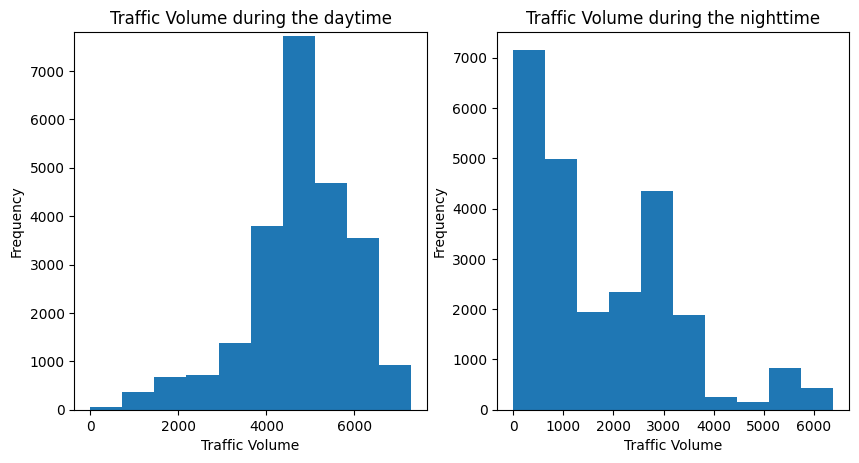

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
df_daytime['traffic_volume'].plot.hist()
plt.title('Traffic Volume during the daytime')
plt.xlabel('Traffic Volume')
plt.ylim([0, 7800])

plt.subplot(1, 2, 2)
df_nighttime['traffic_volume'].plot.hist()
plt.title('Traffic Volume during the nighttime')
plt.xlabel('Traffic Volume')

plt.show()

Both histogram have skewed didstribution:

- The daytime is **left skewed**;
- The nighttime is **right skewed**.

In [12]:
df_daytime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [13]:
df_nighttime['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

### Time Indicators

In [14]:
df_daytime['month'] = df_daytime['date_time'].dt.month
by_month = df_daytime.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-14-38b40669d819>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

In [15]:
months =[dt.datetime.strftime(dt.datetime(2021, i, 1), "%B") 
         for i in range(1, 13)]
week_of_days = [dt.datetime.strftime(dt.datetime(2021, 9, 6 + i), "%A")
               for i in range(0, 7)]

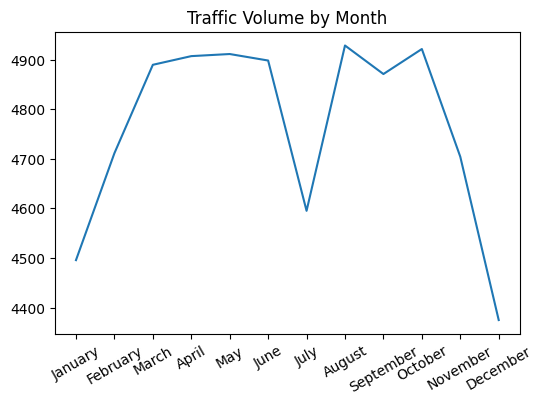

In [16]:
plt.plot(by_month['traffic_volume'])
plt.title('Traffic Volume by Month')
plt.xticks(ticks=by_month['traffic_volume'].index, labels=months, rotation=30)

plt.show()

In [17]:
df_daytime['dayofweek'] = df_daytime['date_time'].dt.dayofweek
by_dayofweek = df_daytime.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

<ipython-input-17-caf1a6bc5e9e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

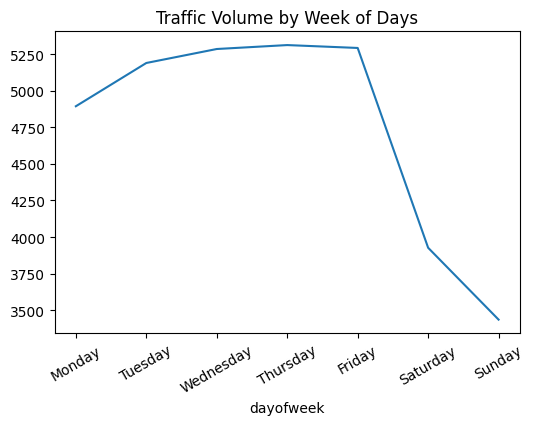

In [25]:
by_dayofweek['traffic_volume'].plot.line()
plt.xticks(by_dayofweek['traffic_volume'].index, labels=week_of_days, rotation=30)
plt.title('Traffic Volume by Week of Days')
plt.show()

In [22]:
df_daytime['hour'] = df_daytime['date_time'].dt.hour
bussiness_days = df_daytime.copy()[df_daytime['dayofweek'] <= 4]
weekend = df_daytime.copy()[df_daytime['dayofweek'] >= 5]
by_hour_bussiness = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

<ipython-input-22-7e1f595a4ea3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



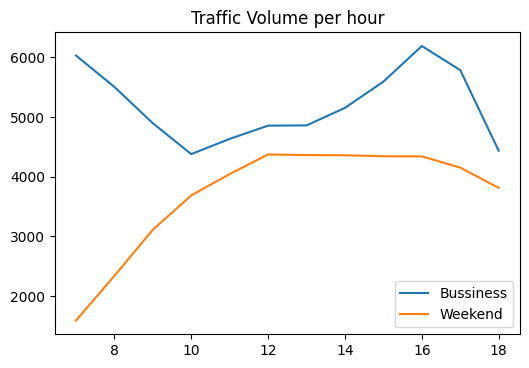

In [27]:
plt.plot(by_hour_bussiness['traffic_volume'], label='Bussiness')
plt.plot(by_hour_weekend['traffic_volume'], label='Weekend')
plt.legend()
plt.title("Traffic Volume per hour")
plt.show()

- On **Bussiness day** the heavy traffic is at 7h and 16h
- In **Weekend** the traffic became higher during the morning and get stable at afternoon

### Finding correlations

In [47]:
df_daytime.corr().loc[['traffic_volume'], ['temp', 'rain_1h', 'snow_1h', 'clouds_all']]

,temp,rain_1h,snow_1h,clouds_all
traffic_volume,0.128317,0.003697,0.001265,-0.032932


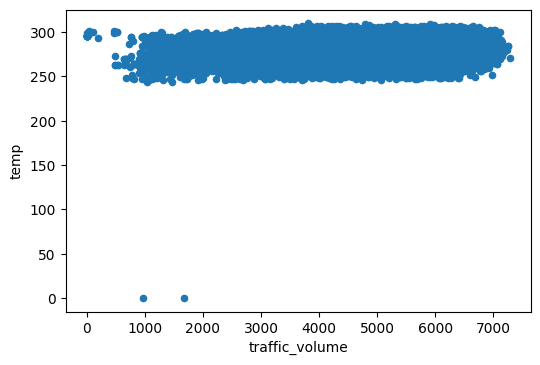

In [49]:
df_daytime.plot.scatter(x='traffic_volume', y='temp')
plt.show()

There is any reliable indicator of heavy traffic.

In [50]:
by_weather_main = df_daytime.groupby('weather_main').mean()
by_weather_description = df_daytime.groupby('weather_description').mean()

Text(0.5, 1.0, 'Types of Weather')

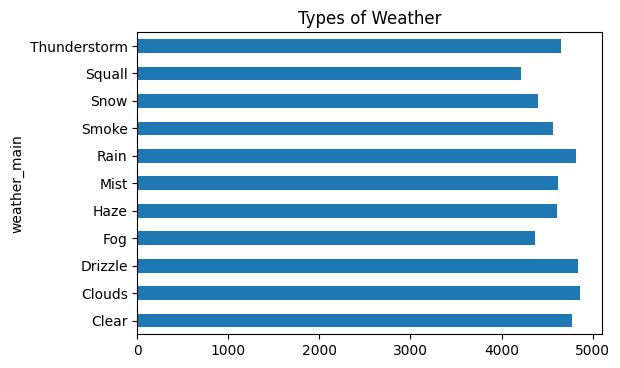

In [53]:
by_weather_main['traffic_volume'].plot.barh()
plt.title("Types of Weather")

No one type of weather indicates a heavy traffic. All them are associated with car quantity between 4,000 and 5,000

Text(0.5, 1.0, 'Description of weather type')

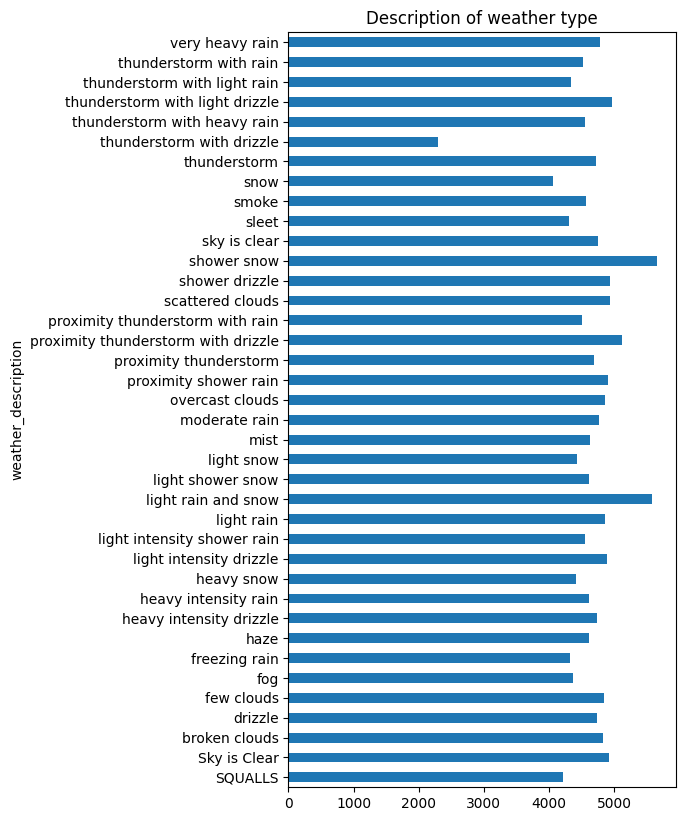

In [61]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.title("Description of weather type")

The heavy traffic indicator could be "light rain and snow", "shower snow" and "proximity thunderstorm with drizzle" which are related to more than 5,000 car

### Summary

Those indicator below are strong associated with heavy traffic:
- **Weahter**: "Light rain and snow", "proximity thunderstorm with drizzle" and "Shower snow";
- **Months** : March to June, August to October;
- **Weekdays**: Bussiness day;
- **Day time**: During the day, specially at 7am and 4pm.

In [ ]:
Use the nighttime data to look for heavy traffic indicators.
Find more time and weather indicators.
Make your project portfolio-ready by following this style guide.

In [62]:
https://www.dataquest.io/blog/data-science-project-style-guide/

SyntaxError: invalid syntax (<ipython-input-62-004db751520e>, line 1)